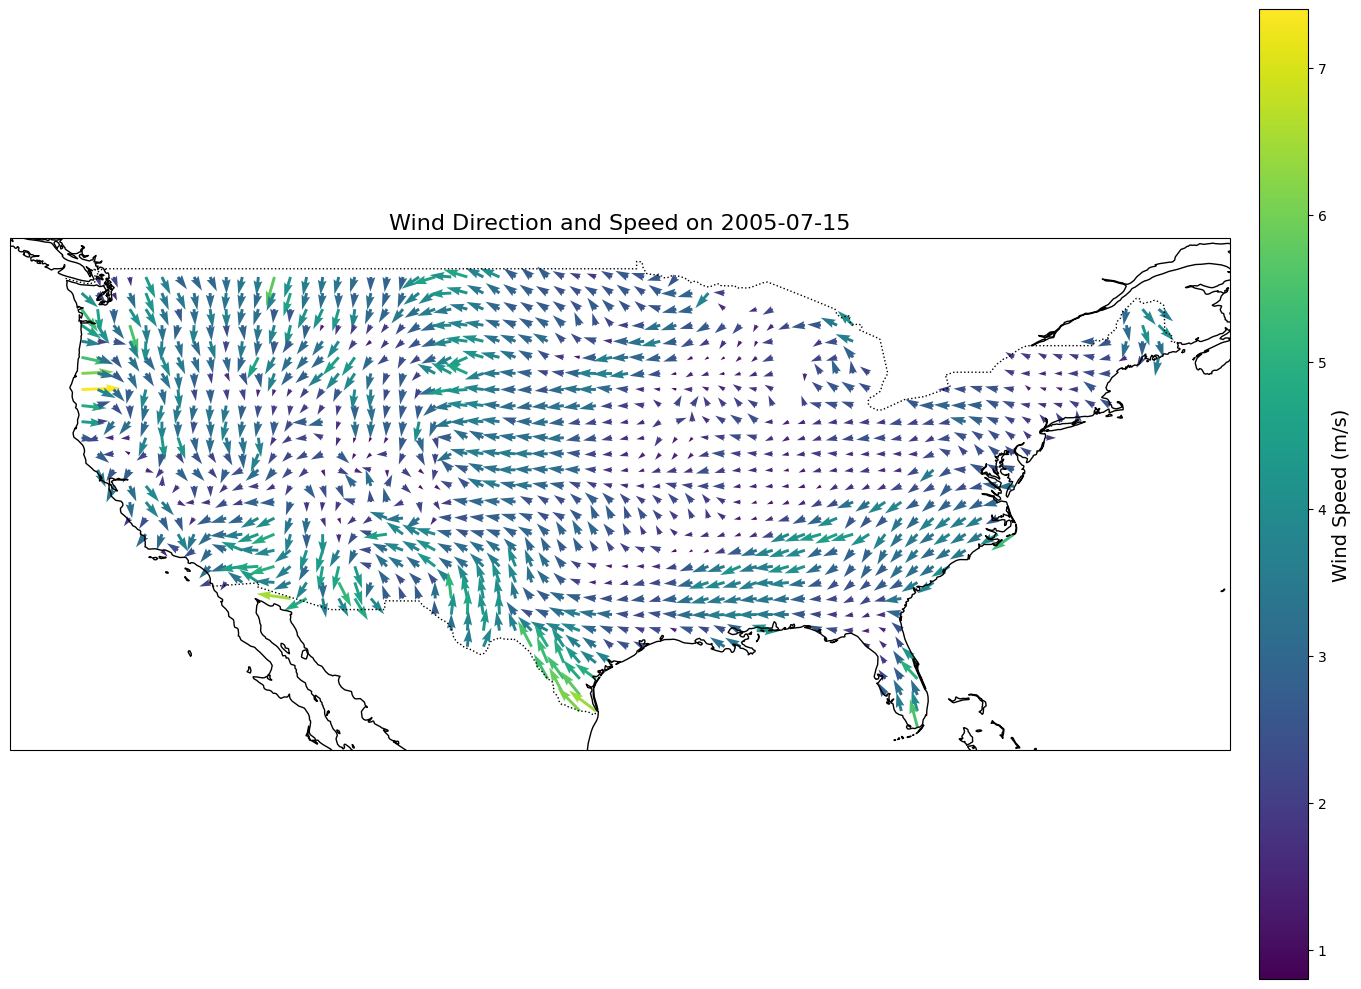

<Figure size 640x480 with 0 Axes>

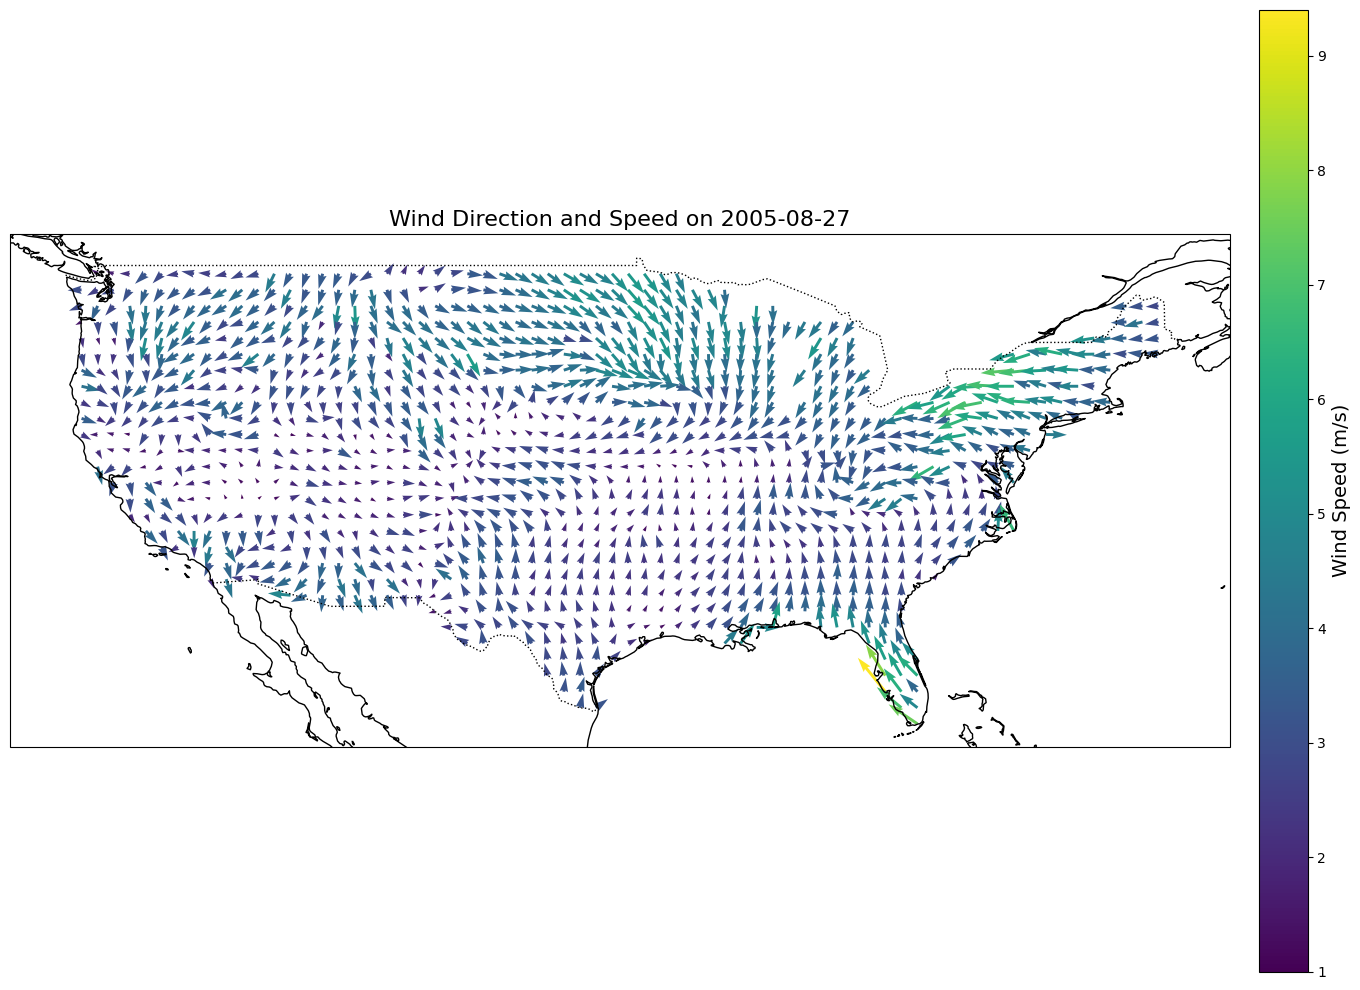

<Figure size 640x480 with 0 Axes>

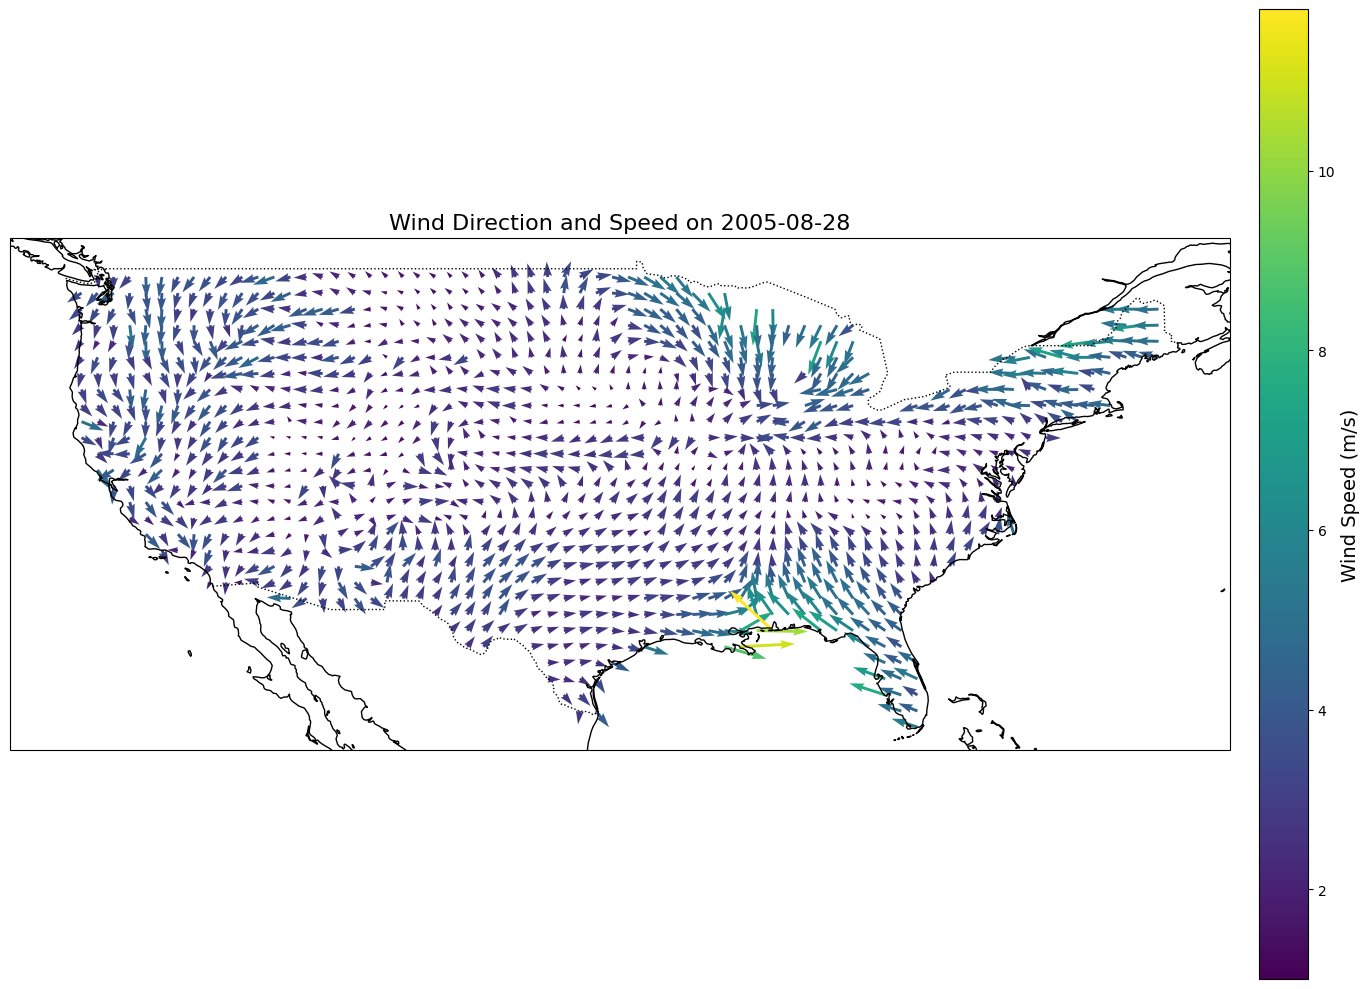

<Figure size 640x480 with 0 Axes>

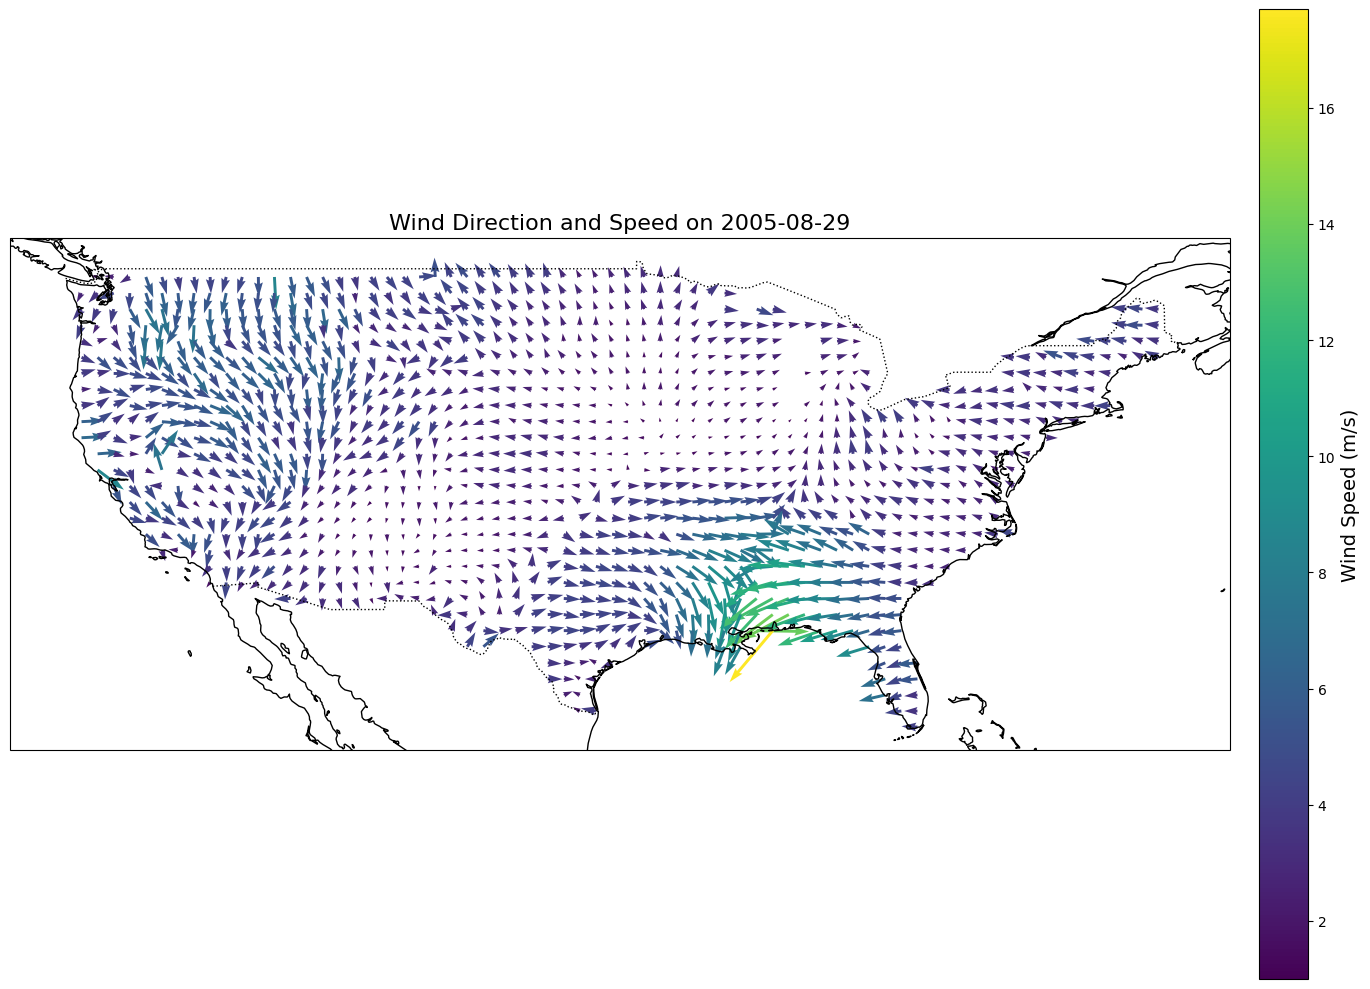

<Figure size 640x480 with 0 Axes>

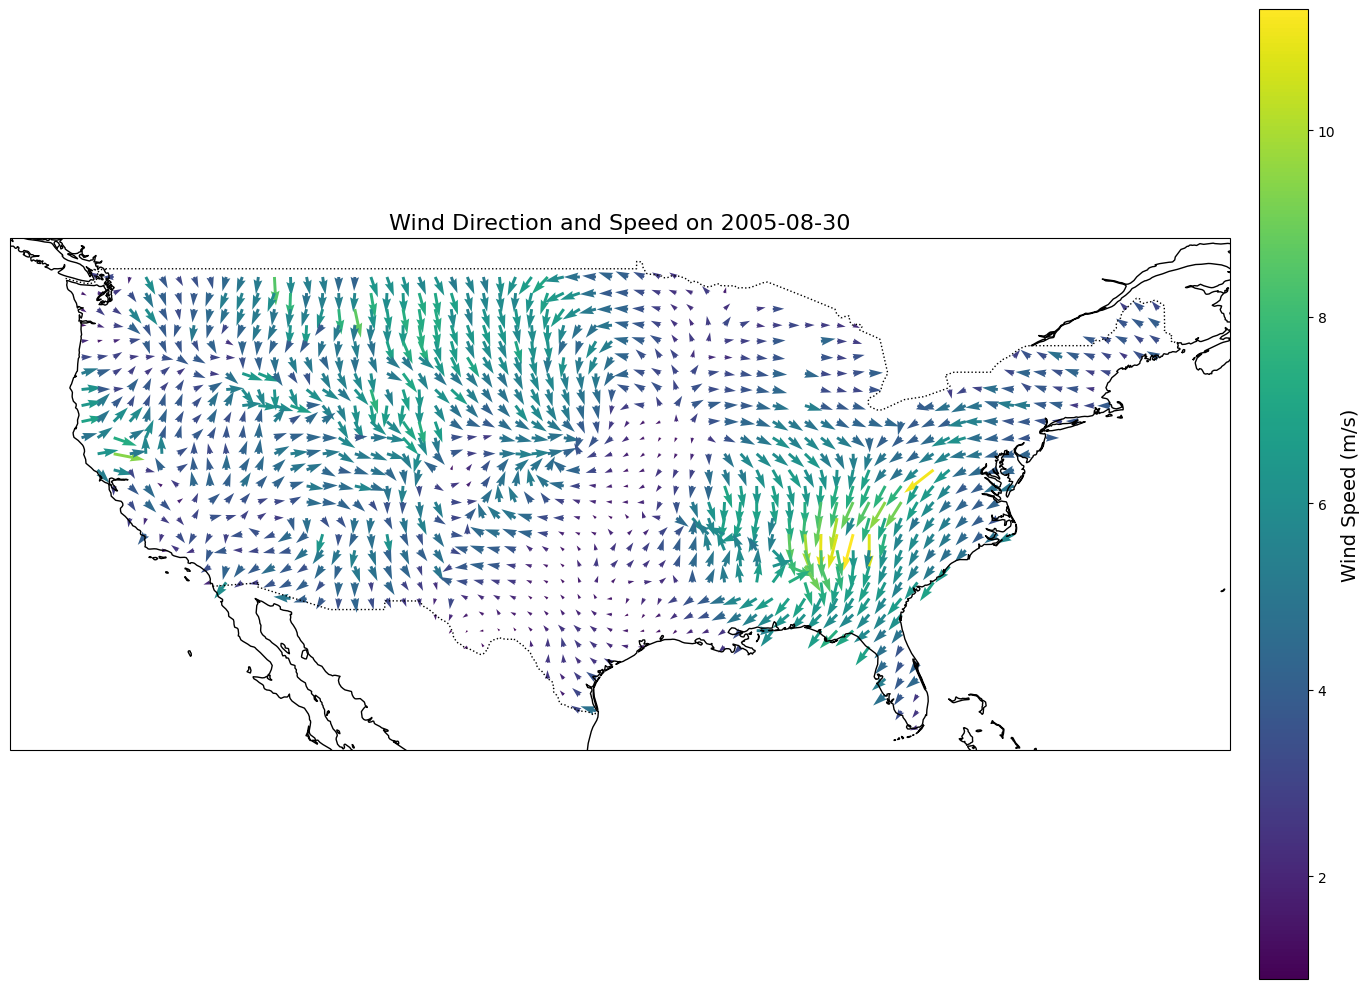

<Figure size 640x480 with 0 Axes>

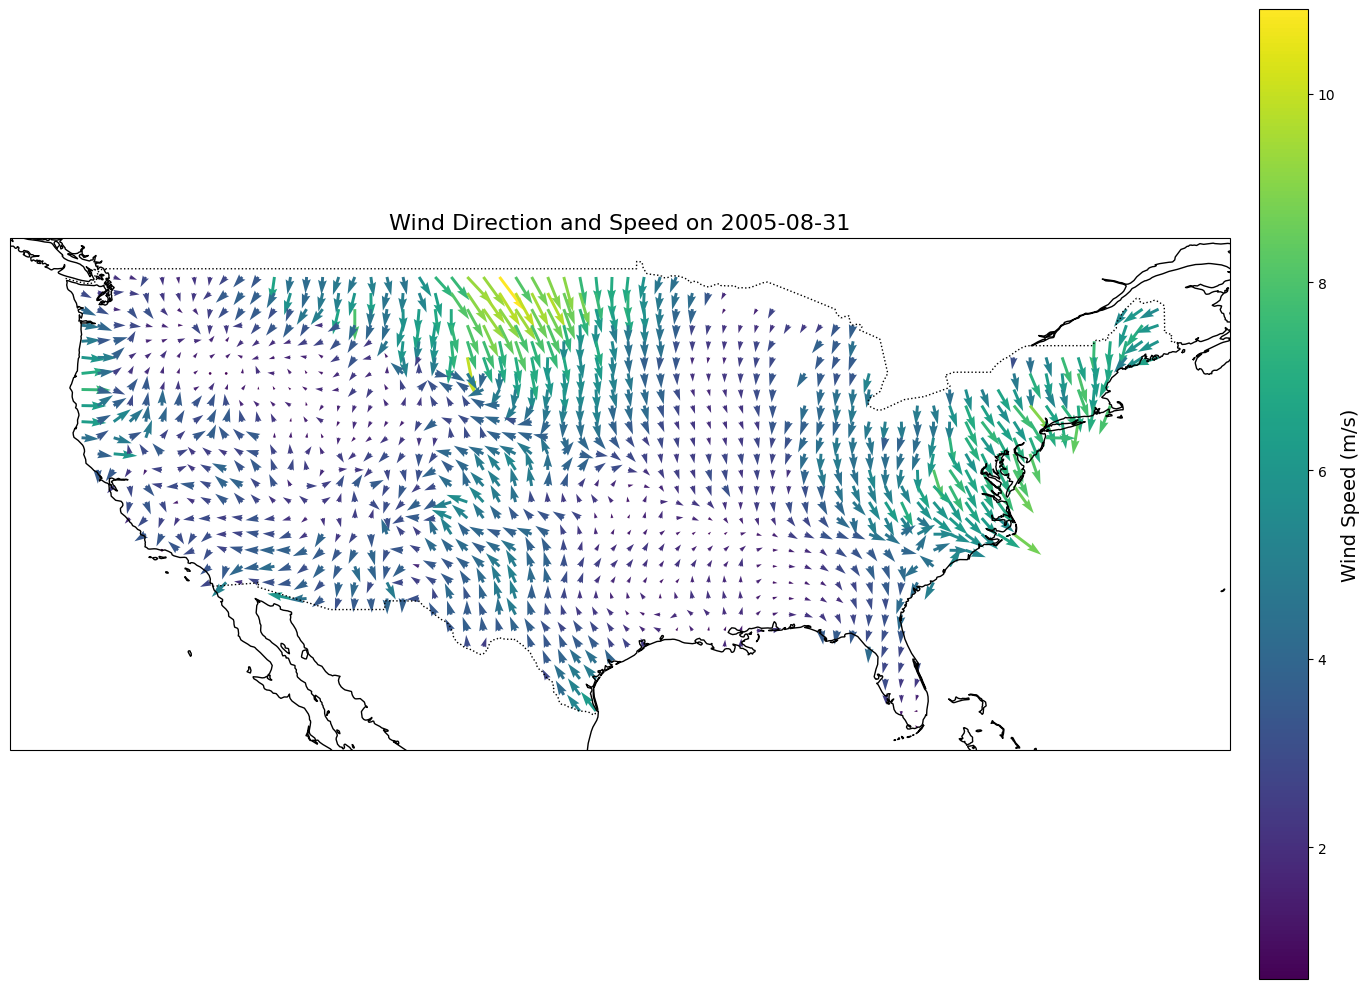

<Figure size 640x480 with 0 Axes>

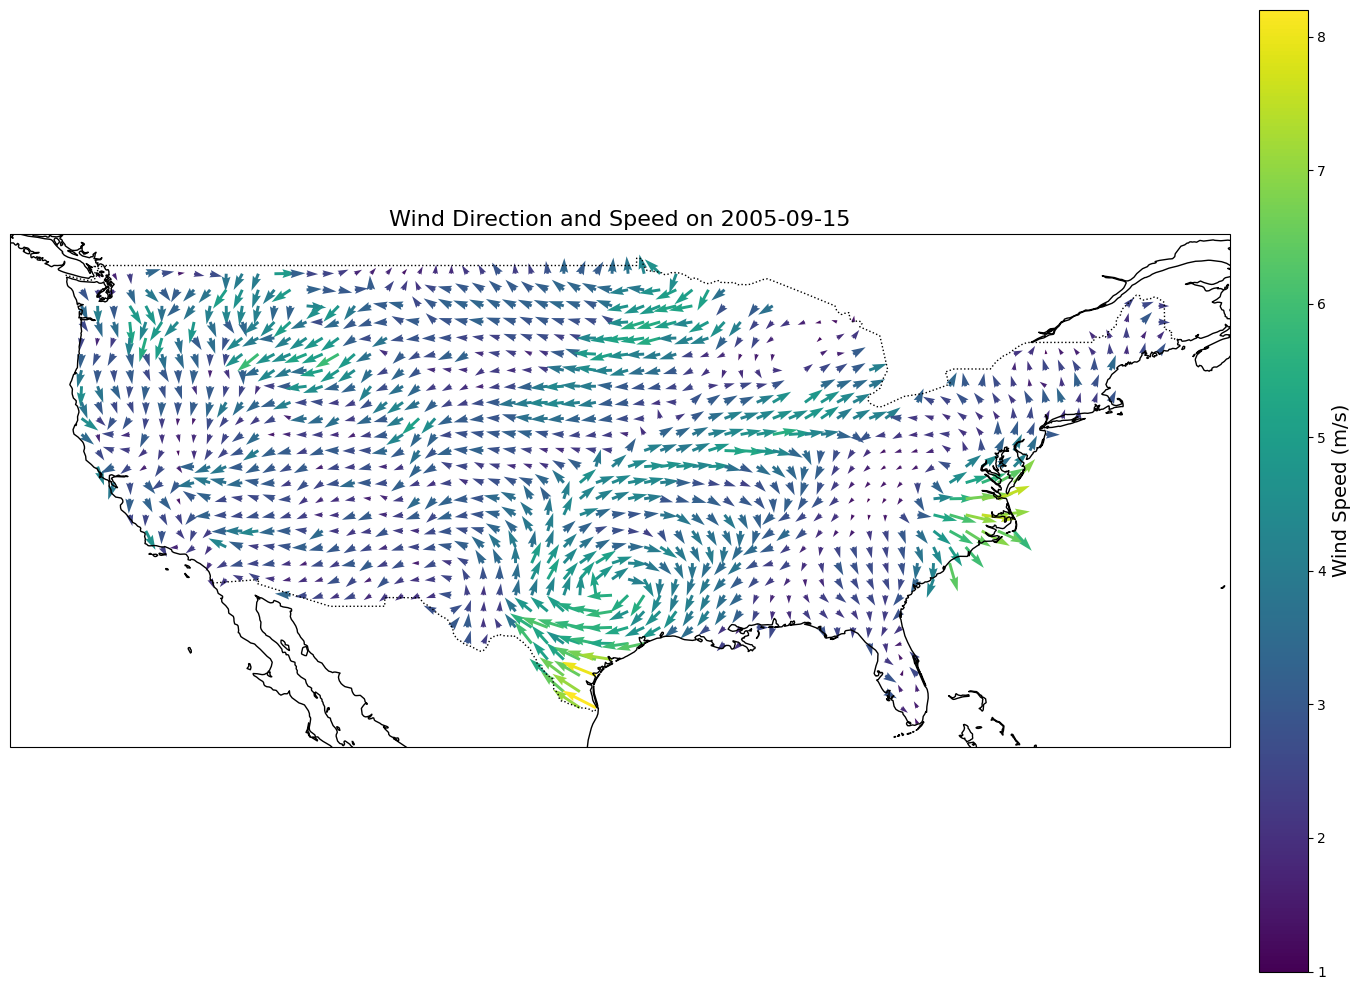

<Figure size 640x480 with 0 Axes>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs  # Import for map projections and coastlines
import cartopy.feature as cfeature

# Load the .nc files for wind speed (vs) and wind direction (th)
vs_file_path = 'vs_2005.nc'
th_file_path = 'th_2005.nc'

# Open the datasets
vs_data = xr.open_dataset(vs_file_path)
th_data = xr.open_dataset(th_file_path)

# Define the days for each month to plot (5 days in July, August, September)
days_july = ["2005-07-15"]
days_august = ["2005-08-27", "2005-08-28", "2005-08-29", "2005-08-30", "2005-08-31"]
days_september = ["2005-09-15"]
selected_days = days_july + days_august + days_september

# Extract data for selected days
vs_selected = vs_data.sel(day=selected_days)
th_selected = th_data.sel(day=selected_days)

for day in selected_days:
    # Create a new figure for each day
    fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})  # Set figure size
    
    # Get wind speed and direction data for the day
    wind_speed = vs_selected.wind_speed.sel(day=day)
    wind_direction = th_selected.wind_from_direction.sel(day=day)
    
    # Convert direction (degrees) to radians for U and V wind component calculations
    theta = np.deg2rad(wind_direction)
    u = wind_speed * np.cos(theta)
    v = wind_speed * np.sin(theta)
    
    # Select a subset of data for visualization (sparse for clarity)
    lon = wind_speed.lon[::20]  # Sample every 20th for better visualization
    lat = wind_speed.lat[::20]
    u = u[::20, ::20]
    v = v[::20, ::20]
    speed = wind_speed[::20, ::20]
    
    # Plot the quiver with map outlines
    quiver = ax.quiver(lon, lat, u, v, speed, cmap='viridis', transform=ccrs.PlateCarree())
    ax.set_title(f"Wind Direction and Speed on {day}", fontsize=16)
    
    # Add map features
    ax.coastlines()  # Add coastlines
    ax.add_feature(cfeature.BORDERS, linestyle=':')  # Add borders

    # Color bar
    cbar = plt.colorbar(quiver, ax=ax, orientation='vertical', pad=0.02)
    cbar.set_label("Wind Speed (m/s)", fontsize=14)

    plt.tight_layout()
    plt.show()  # Display each plot individually

    # Save each plot individually
    plt.savefig(f"wind_close_plot_{day}.png", bbox_inches='tight')  # Save the figure with the date in the filename
    plt.close(fig)  # Close the figure to free memory
